Try to implement the functions in fsmc_code.py and complete lines with "###"

In [1]:
import numpy as np
import nbconvert
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']
%matplotlib inline

### Exercise 2.1

What is the distribution of the number of fair coin tosses before one observes 3 heads in a row? To solve this, consider a 4-state Markov chain with transition probability matrix
$$
    P = 
    \begin{bmatrix}
        0.5 & 0.5 & 0 & 0 \\
        0.5 & 0 & 0.5 & 0 \\
        0.5 & 0 & 0 & 0.5 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$
where $ X_t = 1 $ if the previous toss was tails, $ X_t = 2 $ if the last two tosses were tails then heads, $ X_t = 3 $ if the last three tosses were tails then heads twice, and $ X_t = 4 $ is an absorbing state that is reached when the last three tosses are heads. 

* Write a computer program (e.g., in Python) to compute $ \Pr(T_{1,4} = m) $ for $ m = 1, 2, \ldots, 100 $ and use this to estimate expected number of tosses $ \mathbb{E}[T_{1,4}] $. 

Text(0.5, 1.0, '$\\mathbb{E}[T_{1,4}] = 13.972692578968473 $')

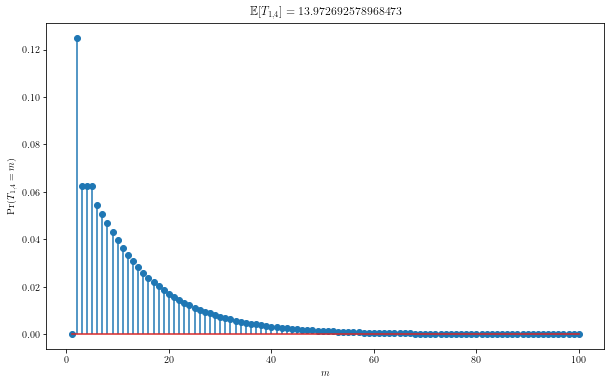

In [2]:
#See compute_Phi_ET in fsmc_code.py
def compute_Phi_ET(P, ns=100):
    '''
    Arguments:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
        ns {int} -- largest step to consider

    Returns:
        Phi_list {numpy.array} -- (ns + 1) x n x n, the Phi matrix for time 0, 1, ...,ns
        ET {numpy.array} -- n x n, expectedd hitting time approxiamated up to step ns
    '''
    Phi_list = np.zeros([ns+1,P.shape[0],P.shape[1]])
    Phi_list[0] = P
    for i in range(1,ns+1):
        Phi_list[i] = np.matmul(P, Phi_list[i-1])
    ET = np.zeros(P.shape)
    for i in range(1,ns+1):
        ET += (i+1)*(Phi_list[i] - Phi_list[i-1])
    return Phi_list, ET

P = np.array([[0.5, 0.5, 0, 0], [0.5, 0, 0.5, 0], [0.5, 0, 0, 0.5], [0, 0, 0, 1]])  
Phi_list, ET = compute_Phi_ET(P, 100)

m = np.arange(1,101) ### steps to be plotted
Pr = Phi_list[m,0,3] - Phi_list[m-1,0,3] ### \Pr(T_{1,4} = m) for all m
E = ET[0,3] ### \mathbb{E}[T_{1,4}]

plt.figure(figsize=(10, 6))
plt.stem(m, Pr, use_line_collection= True)
plt.xlabel(r'$m$')
plt.ylabel(r'$\Pr(T_{1,4}=m)$')
plt.title(r'$\mathbb{E}[T_{1,4}] = ' + str(E) + ' $')

* Write a computer program that generates 500 realizations from this Markov chain and uses them to plots a histogram of $ T_{1,4} $.

Text(0.5, 1.0, 'mean of $ T_{1,4} = ~ $14.658')

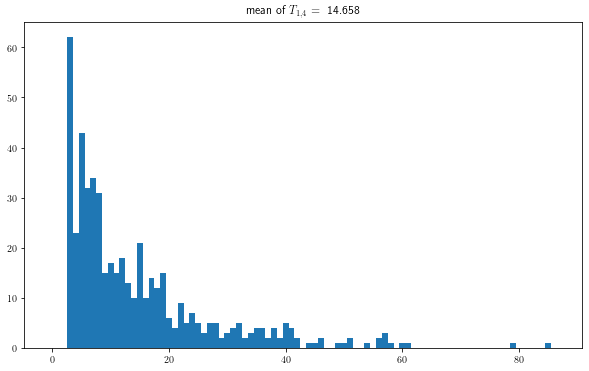

In [15]:
# implement simulate_hitting_time(P, states, nr) in fsmc_code.py

def vector(index, m):
    m = np.zeros(m.size)
    m[index] = 1
    return m

# General function to simulate hitting time for Exercise 2.1
def simulate_hitting_time(P, states, nr):
    '''
    Arguments:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
        states {list[int]} -- the list [start state, end state], index starts from 0
        nr {int} -- largest step to consider

    Returns:
        T {list[int]} -- a size nr list contains the hitting time of all realizations
    '''
    # Add code here to simulate following quantities:
    # T[i] = hitting time of the i-th run (i.e., realization) of process
    # Notice in python the index starts from 0
    start, end = states
    if start == end: return [0] * nr
    T = np.zeros(nr)
    for k in range(nr):
        curr_state = start
        step = 0
        next_state = start
        q = np.zeros(P.shape[0]) 
        while(curr_state != end):
            i = 0
            u = np.random.random_sample()
            curr_vec = vector(curr_state,q)
            cdf_vec = np.cumsum(np.matmul(curr_vec, P))
            if(u < cdf_vec[0]):
                next_state = 0
            while(u >= cdf_vec[i]):
                if(u < cdf_vec[i+1]):
                    next_state = i+1
                i += 1
            step = step + 1
            curr_state = next_state
        T[k] = step
    return T

T = simulate_hitting_time(P, [0, 3], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of $ T_{1,4} = ~ $' + str(np.mean(T)))

### Exercise 2.2

Consider the miniature chutes and ladders game shown in Figure 1. 
Assume a player starts on the space labeled 1 and plays by rolling a fair four-sided die and then moves that number of spaces. 
If a player lands on the bottom of a ladder, then they automatically climb to the top. 
If a player lands at the top of a slide, then they automatically slide to the bottom. 
This process can be modeled by a Markov chain with $ n = 16 $ states where each state is associated with a square where players can start their turn (e.g., players never start at the bottom of a ladder or the top of a slide). 
To finish the game, players must land exactly on space 20 (moves beyond this are not taken). 

* Compute the transition probability matrix $ P $ of the implied Markov chain. 

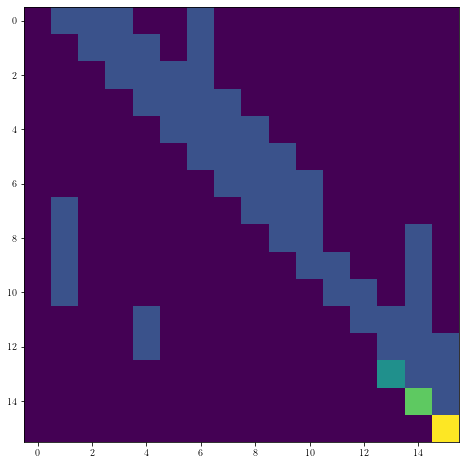

In [16]:
# You can either do this by hand (e.g., look at picture and write down matrix) or by automating the process.

# By hand
#P = np.asarray([[...],[...],[...],...])
# Or automated general function for Chutes and Ladders games
def construct_P_matrix(n, dice, chutes, ladders):
    '''
    Arguments:
        n {int} -- size of the state space
        dice {numpy.array} -- probability distribution of the dice outcome
        chutes {list[(int, int)]} -- the list of chutes, in pairs of (start, end)
        ladders {list[(int, int)]} -- the list of ladders, in pairs of (start, end)

    Returns:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
    '''

    # Add code here to build matrix
    c = len(chutes)
    l = len(ladders)
    P = np.zeros((n+c+l,n+c+l))
    for i in range (n+c+l):
            if(i+len(dice) < n+c+l):
                P[i,i+1:i+len(dice)+1] = dice
            else:
                P[i,i+1:n+c+l] = dice[0:(n+c+l-i-1)]
                P[i,i] = 1 - sum(dice[0:(n+c+l-i-1)])
    delete_row = [0]*(l+c)
    for i in range(c):
        P[:,chutes[i][1]-1] += P[:,chutes[i][0]-1]
        delete_row[i] = chutes[i][0]-1
    for i in range(l):
        P[:,ladders[i][1]-1] += P[:,ladders[i][0]-1]
        delete_row[i+c] = ladders[i][0]-1

    P = np.delete(P,delete_row,0)
    P = np.delete(P,delete_row,1)
    P[n-1,n-1] = 1
    return P


n = 16 ### number of states
dice = np.array([0.25,0.25,0.25,0.25]) ### probability distribution of dice
chutes = [(13,2), (17,6)] ### (sorce, destination) pairs of chutes
ladders = [(4,8),(14,19)] ### (sorce, destination) pairs of ladders
P = construct_P_matrix(n, dice, chutes, ladders)

# Plot transition matrix
plt.figure(figsize=(8, 8))
plt.imshow(P)

* For this Markov chain, write a computer program (e.g., in Python) to compute the cumulative distribution of the number turns a player takes to finish (i.e., the probability $ \Pr(T_{1, 20} \le m) $ where $ T_{1, 20} $ is the hitting time from state 1 to state 20).


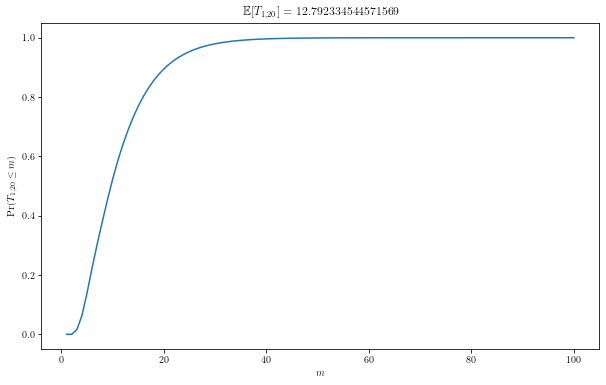

In [17]:
# Use previous functions to complete this exercise
Phi_list, ET = compute_Phi_ET(P, ns=100)
m = np.arange(1,101) ### steps to be plotted
Pr = Phi_list[m,0,15] ### \Pr(T_{1,4} = m) for all m
E = ET[0,15]
plt.figure(figsize=(10, 6))
plt.plot(m ,Pr)
plt.xlabel(r'$ m $')
plt.ylabel(r'$ \Pr(T_{1,20} \leq m) $')
plt.title(r'$ \mathbb{E}[T_{1,20}] = ' + str(E) + ' $');

* Write a computer program that generates 500 realizations from this Markov chain and uses them to plot a histogram of $ T_{1, 20} $.


Text(0.5, 1.0, 'mean of $ T_{1,20} = ~ $13.346')

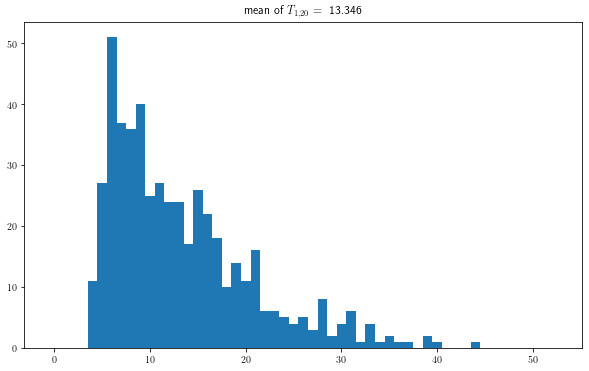

In [9]:
# Use previous funcitons to complete this exercise
T = simulate_hitting_time(P, [0, n-1], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of $ T_{1,20} = ~ $' + str(np.mean(T)))

* Optional Challenge: If the ﬁrst player rolls 4 and climbs the ladder to square 8, then what is the probability that the second player will win.

In [ ]:
# Use previous functions to complete this exercise

### compute Pr_win


### Example 2.3

In a certain city, it is said that the weather is rainy with a 90% probability if it was rainy the previous day and with a 50% probability if it not rainy the previous day. 
If we assume that only the previous day’s weather matters, then we can model the weather of this city by a Markov chain with $ n = 2 $ states whose transitions are governed by
$$
    P = 
    \begin{bmatrix}
        0.9 & 0.1 \\
        0.5 & 0.5
    \end{bmatrix}
$$
Under this model, what is the steady-state probability of rainy weather?


In [10]:
# implement stationary_distribution(P) in fsmc.py
def nullspace(A, atol=1e-13, rtol=0):
    A = np.atleast_2d(A)
    u, s, vh = np.linalg.svd(A)
    tol = max(atol, rtol * s[0])
    nnz = (s >= tol).sum()
    ns = vh[nnz:].conj().T
    return ns



# General function to approximate the stationary distribution of a Markov chain for Exercise 2.4
def stationary_distribution(P):
    '''
    Arguments:
        P {numpy.array} -- n x n, transition matrix of the Markov chain

    Returns:
        pi {numpy.array} -- length n, stationary distribution of the Markov chain
    '''

    # Add code here: Think of pi as column vector, solve linear equations:
    #     P^T pi = pi
    #     sum(pi) = 1
    I = np.identity(P.shape[0])
    Transf = (I-P).T
    A = nullspace(Transf)
    A = A/sum(A)
    return A


P = np.array([[0.9, 0.1], [0.5, 0.5]])
stationary_distribution(P)

array([[0.83333333],
       [0.16666667]])

### Exercise 2.4

Consider a game where the gameboard has 8 diﬀerent spaces arranged in a circle. 
During each turn, a player rolls two 4-sided dice and moves clockwise by a number of spaces equal to their sum. 
Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

In [11]:
# Use previous functions to complete this exercise
### construct the transition matrix
P = np.zeros((8,8))
P[0,:] = [1/16,0,1/16,2/16,3/16,4/16,3/16,2/16]
for i in range(1,8):
    P[i,:] = np.roll(P[i-1,:],1)
print(P)
stationary_distribution(P)

[[0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875 0.125 ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([[0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125],
       [0.125]])

Next, suppose that one space is special (e.g., state-1 of the Markov chain) and a player can only leave this space by rolling doubles (i.e., when both dice show the same value). Again, the player moves clockwise by a number of spaces equal to their sum. Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

In [12]:
# Use previous functions to complete this exercise
### construct the transition matrix
P = np.zeros((8,8)) ### construct the transition matrix
P[0,:] = [13/16,0,1/16,0,1/16,0,1/16,0]
P[1,:] = np.roll([1/16,0,1/16,2/16,3/16,4/16,3/16,2/16],1)
for i in range(2,8):
    P[i,:] = np.roll(P[i-1,:],1)
print(P)
stationary_distribution(P)

[[0.8125 0.     0.0625 0.     0.0625 0.     0.0625 0.    ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([[0.41836864],
       [0.08285234],
       [0.10176963],
       [0.07092795],
       [0.09311176],
       [0.0625555 ],
       [0.09593429],
       [0.07447989]])